<a href="https://colab.research.google.com/github/Ganesh00000/wine_quality_test/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from google.colab import files

In [3]:
files.upload()

Saving winequality-red (1).csv to winequality-red (1).csv


{'winequality-red (1).csv': b'fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality\r\n7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5\r\n7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5\r\n7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5\r\n11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6\r\n7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5\r\n7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5\r\n7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5\r\n7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7\r\n7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7\r\n7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5\r\n6.7,0.58,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,5\r\n7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5\r\n5.6,0.615,0,1.6,0.089,16,59,0.9943,3.58,0.52,9.9,5\r\n7.8,0.61,0.29,1.6,0.114,9,29,0.9974,3.26,1.56,9.1,5\r\n8.9,0.62,0.18,3.8,0.176,52,145,0.9986,3.16,0.88,9.2,5\r\n8.9,0.62

In [4]:
data=pd.read_csv("/content/winequality-red (1).csv")

In [5]:
data.shape

(1599, 12)

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


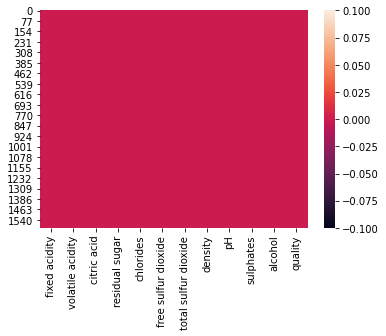

In [7]:
sb.heatmap(pd.isnull(data))

In [8]:
data["quality"].unique()

array([5, 6, 7, 4, 8, 3])

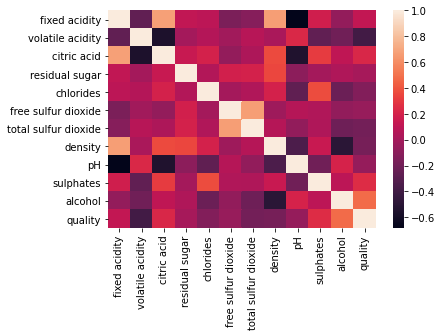

In [11]:
sb.heatmap(data.corr())

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [13]:
x=data.drop("quality",axis=1)
y=data["quality"]

In [14]:
classifier=LogisticRegression()

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
classifier.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_predict=classifier.predict(x_test)

In [18]:
print(pd.DataFrame({"Actual":y_test,"Predicted":y_predict}))

      Actual  Predicted
1029       7          6
66         5          5
1063       6          6
656        5          6
653        6          6
...      ...        ...
553        5          5
478        5          5
151        4          6
969        5          5
1503       6          6

[320 rows x 2 columns]


In [20]:
from sklearn import metrics as mc

In [21]:
print(mc.accuracy_score(y_test,y_predict))

0.596875
